In [1]:
import dspa_viz_py 
import pandas as pd

/Users/ekrismer/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from Bio import SeqIO
fasta_file = "../data/170721_uniprot_Sce_HRMkit_PK_standards_plusASN.fasta"
yeast_proteins = set()
handle = open(fasta_file, "r")
fasta = list(SeqIO.parse(handle, "fasta"))
for record in fasta:    yeast_proteins.add(record.id.split("|")[1])
handle.close()

print(len(yeast_proteins))

6754


In [3]:
LiP_df = pd.read_csv('../data/example_diff_abundance_output.csv', 
                     sep = ",")

In [4]:
proteins_in_file_fasta = []
for record in fasta:
    if record.id.split("|")[1] in LiP_df.pg_protein_accessions.unique():
        proteins_in_file_fasta.append(record)
        
print ("Found %d proteins in fasta file out of %d in proteins_file" % (len(proteins_in_file_fasta), len(LiP_df.pg_protein_accessions.unique())))
proteins_in_file_fasta_dict = dict([(rec.id.split("|")[1], rec) for rec in proteins_in_file_fasta])

Found 3193 proteins in fasta file out of 3209 in proteins_file


In [5]:
aa_seq = proteins_in_file_fasta_dict['P00925'].seq

In [6]:
aa_seq

Seq('MAVSKVYARSVYDSRGNPTVEVELTTEKGVFRSIVPSGASTGVHEALEMRDEDK...DKL')

In [7]:
LiP_df[LiP_df.pg_protein_accessions == 'P00925'].sort_values('start', inplace=True)

/var/folders/sk/gdsgwx3176g0lybg31q6fx4w0000gq/T/ipykernel_18104/620393158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LiP_df[LiP_df.pg_protein_accessions == 'P00925'].sort_values('start', inplace=True)


/Users/ekrismer/Documents/GitHub/dspa-viz-py/dspa_viz_py/barcode.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LiP_df[LiP_df.pg_protein_accessions == prot].sort_values('start', inplace=True)


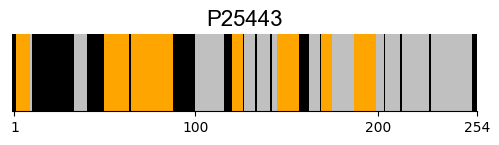

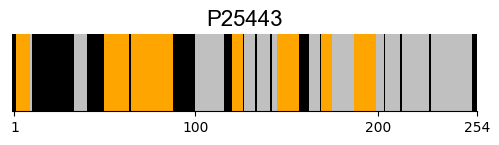

In [8]:
dspa_viz_py.BarcodePlotter(
    proteins_in_file_fasta_dict=proteins_in_file_fasta_dict,
    organism_proteins=yeast_proteins
).plot_dynamics_barcode('P25443', LiP_df, 0.05,1)

/Users/ekrismer/Documents/GitHub/dspa-viz-py/dspa_viz_py/barcode.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LiP_df[LiP_df.pg_protein_accessions == prot].sort_values('start', inplace=True)


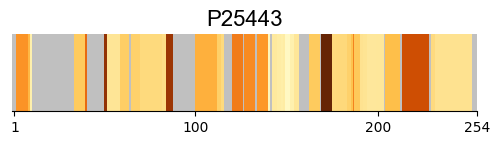

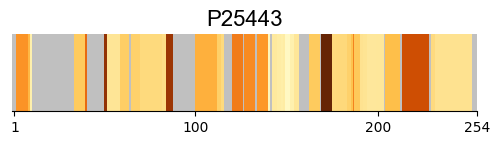

In [9]:
dspa_viz_py.BarcodePlotter(
    proteins_in_file_fasta_dict=proteins_in_file_fasta_dict,
    organism_proteins=yeast_proteins
).plot_residuelevel_barcode('P25443', LiP_df, 0.05,1)